In [267]:
#importing data and tools we need for the project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols


calendar = pd.read_csv('https://tinyurl.com/techacademyCalendar')
listings = pd.read_csv('https://tinyurl.com/techacademyListings')
reviews = pd.read_csv('https://tinyurl.com/techacademyReviews')

In [268]:
listings.head()

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1
1,22607348,$10.00,Treptow - Köpenick,52.468095,13.487103,1.0,0,1.0,1.0,9.0,Real Bed,30,1124,156,Apartment,f,NaN,Private room,NaN,1
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1
3,21919556,$99.00,Pankow,52.537269,13.416036,2.0,0,2.0,2.0,NaN,Real Bed,14,41,35,Apartment,f,$50.00,Entire home/apt,NaN,1
4,4820648,$39.00,Friedrichshain-Kreuzberg,52.491483,13.387362,1.0,0,1.0,1.0,9.0,Real Bed,60,1125,289,Apartment,f,NaN,Entire home/apt,NaN,1


In [269]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13531 non-null  int64  
 1   price                         13531 non-null  object 
 2   neighbourhood_group_cleansed  13531 non-null  object 
 3   latitude                      13531 non-null  float64
 4   longitude                     13531 non-null  float64
 5   bathrooms                     13508 non-null  float64
 6   availability_30               13531 non-null  int64  
 7   beds                          13502 non-null  float64
 8   bedrooms                      13520 non-null  float64
 9   review_scores_value           10853 non-null  float64
 10  bed_type                      13531 non-null  object 
 11  minimum_nights                13531 non-null  int64  
 12  maximum_nights                13531 non-null  int64  
 13  a

In [270]:
calendar.head()

,listing_id,date,available,price
0,159454,2019-09-10,t,$161.00
1,159454,2019-09-09,t,$161.00
2,159454,2019-09-08,t,$161.00
3,159454,2019-09-07,t,$161.00
4,159454,2019-09-06,t,$161.00


In [271]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547500 entries, 0 to 547499
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  547500 non-null  int64 
 1   date        547500 non-null  object
 2   available   547500 non-null  object
 3   price       108744 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.7+ MB


In [272]:
reviews.head()

,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15
2,2015,2016-04-26
3,2015,2016-05-10
4,2015,2016-05-14


In [273]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  401963 non-null  int64 
 1   date        401963 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [274]:
#@title 4. Exploratory Data Analyis

In [275]:
#@title 4.1.1 Apartment Availability
#cleaning the price columns in 'listings' and 'calendar'
calendar['price_use']=calendar['price'].str.replace('$','')
calendar['price_use']=calendar['price_use'].str.replace(',', '')
calendar['price_use']=calendar['price_use'].astype('float')
calendar.head()

,listing_id,date,available,price,price_use
0,159454,2019-09-10,t,$161.00,161.0
1,159454,2019-09-09,t,$161.00,161.0
2,159454,2019-09-08,t,$161.00,161.0
3,159454,2019-09-07,t,$161.00,161.0
4,159454,2019-09-06,t,$161.00,161.0


In [276]:
listings['price_use']=listings['price'].str.replace('$','')
listings['price_use']=listings['price_use'].str.replace(',', '')
listings['price_int']=listings['price_use'].astype('float')
listings.head()

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included,price_use,price_int
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1,50.00,50.0
1,22607348,$10.00,Treptow - Köpenick,52.468095,13.487103,1.0,0,1.0,1.0,9.0,Real Bed,30,1124,156,Apartment,f,NaN,Private room,NaN,1,10.00,10.0
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1,35.00,35.0
3,21919556,$99.00,Pankow,52.537269,13.416036,2.0,0,2.0,2.0,NaN,Real Bed,14,41,35,Apartment,f,$50.00,Entire home/apt,NaN,1,99.00,99.0
4,4820648,$39.00,Friedrichshain-Kreuzberg,52.491483,13.387362,1.0,0,1.0,1.0,9.0,Real Bed,60,1125,289,Apartment,f,NaN,Entire home/apt,NaN,1,39.00,39.0


In [277]:
#Transform t/f to boolean values True/False
calendar['available_bool']=calendar['available'].map({'t':True, 'f':False})
calendar.head()

,listing_id,date,available,price,price_use,available_bool
0,159454,2019-09-10,t,$161.00,161.0,True
1,159454,2019-09-09,t,$161.00,161.0,True
2,159454,2019-09-08,t,$161.00,161.0,True
3,159454,2019-09-07,t,$161.00,161.0,True
4,159454,2019-09-06,t,$161.00,161.0,True


In [278]:
#filtering by available apartments

calendar_av=calendar[calendar['available_bool']==True]
calendar_av

,listing_id,date,available,price,price_use,available_bool
0,159454,2019-09-10,t,$161.00,161.0,True
1,159454,2019-09-09,t,$161.00,161.0,True
2,159454,2019-09-08,t,$161.00,161.0,True
3,159454,2019-09-07,t,$161.00,161.0,True
4,159454,2019-09-06,t,$161.00,161.0,True
...,...,...,...,...,...,...
547493,29796114,2018-11-13,t,$120.00,120.0,True
547494,29796114,2018-11-12,t,$120.00,120.0,True
547495,29796114,2018-11-11,t,$120.00,120.0,True
547496,29796114,2018-11-10,t,$120.00,120.0,True


In [279]:
#Aggregate data after dates

dates_c = calendar_av.groupby('date')['available_bool'].sum().reset_index()
dates_c

,date,available_bool
0,2018-11-07,83
1,2018-11-08,124
2,2018-11-09,118
3,2018-11-10,116
4,2018-11-11,182
...,...,...
360,2019-11-02,292
361,2019-11-03,291
362,2019-11-04,291
363,2019-11-05,295


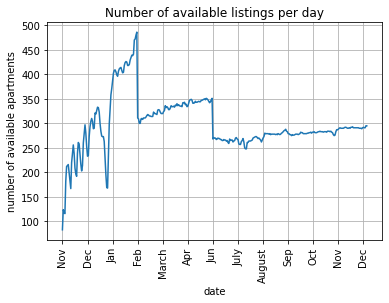

In [280]:
#Plot available apartments over time
listings_month=['Nov', 'Dec','Jan', 'Feb', 'March', 'Apr', 'Jun', 'July', 'August', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax= plt.subplots()
ax.plot(dates_c['date'], dates_c['available_bool'])
plt.xlabel('date')
plt.ylabel('number of available apartments')
plt.xticks(np.arange(365, step= 30), listings_month)
plt.xticks(rotation='vertical')
plt.title('Number of available listings per day')
plt.grid()
plt.show()


In [281]:
#@title 4.2 Visualize individual Airbnb offers with the listings dataset


In [282]:
#Clean and transform the price and cleaning_fee columns to numeric values
listings['cleaning_fee_use']=listings['cleaning_fee'].str.replace('$', '')
listings['cleaning_fee_use']=listings['cleaning_fee_use'].str.replace(',', '')
listings['cleaning_fee_int']=listings['cleaning_fee_use'].astype('float')
listings.head()

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included,price_use,price_int,cleaning_fee_use,cleaning_fee_int
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1,50.00,50.0,0.00,0.0
1,22607348,$10.00,Treptow - Köpenick,52.468095,13.487103,1.0,0,1.0,1.0,9.0,Real Bed,30,1124,156,Apartment,f,NaN,Private room,NaN,1,10.00,10.0,NaN,NaN
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1,35.00,35.0,15.00,15.0
3,21919556,$99.00,Pankow,52.537269,13.416036,2.0,0,2.0,2.0,NaN,Real Bed,14,41,35,Apartment,f,$50.00,Entire home/apt,NaN,1,99.00,99.0,50.00,50.0
4,4820648,$39.00,Friedrichshain-Kreuzberg,52.491483,13.387362,1.0,0,1.0,1.0,9.0,Real Bed,60,1125,289,Apartment,f,NaN,Entire home/apt,NaN,1,39.00,39.0,NaN,NaN


In [283]:
listings['price (cleaning included)'] = listings['price_int'] + listings['cleaning_fee_int']
listings['price (cleaning included)']

0         50.0
1          NaN
2         50.0
3        149.0
4          NaN
         ...  
13526     88.0
13527     45.0
13528      NaN
13529      NaN
13530     60.0
Name: price (cleaning included), Length: 13531, dtype: float64

In [284]:
#Compute mean and standard deviation of apartment prices for each neighborhood
listings_mean=listings.groupby(['neighbourhood_group_cleansed'])['price_int'].mean()
listings_std=listings.groupby(['neighbourhood_group_cleansed'])['price_int'].std()

In [285]:
listings_mean

neighbourhood_group_cleansed
Charlottenburg-Wilm.        133.708768
Friedrichshain-Kreuzberg     62.231076
Lichtenberg                  63.652605
Marzahn - Hellersdorf        58.806452
Mitte                        69.929888
Neukölln                     46.969436
Pankow                       69.911778
Reinickendorf                51.013423
Spandau                      56.434211
Steglitz - Zehlendorf        54.854406
Tempelhof - Schöneberg      104.808602
Treptow - Köpenick           51.413978
Name: price_int, dtype: float64

In [286]:
sorted(listings_mean)
#most expensive = Charlottenburg
#least expensive = Neukölln

[46.9694364851958,
 51.013422818791945,
 51.413978494623656,
 54.8544061302682,
 56.43421052631579,
 58.806451612903224,
 62.23107569721115,
 63.65260545905707,
 69.91177829099307,
 69.92988796530538,
 104.80860215053764,
 133.70876826722338]

In [287]:
CB=listings[listings['neighbourhood_group_cleansed']=='Charlottenburg-Wilm.']
NK=listings[listings['neighbourhood_group_cleansed']=='Neukölln']

CB_mean = CB['price_int'].mean()
CB_mean_cleaning = CB['cleaning_fee_int'].mean()

NK_mean = NK['price_int'].mean()
NK_mean_cleaning = NK['cleaning_fee_int'].mean()


In [288]:
CB

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included,price_use,price_int,cleaning_fee_use,cleaning_fee_int,price (cleaning included)
35,18970937,$45.00,Charlottenburg-Wilm.,52.504844,13.313824,2.0,0,2.0,2.0,9.0,Real Bed,4,150,139,Apartment,f,$40.00,Private room,NaN,1,45.00,45.0,40.00,40.0,85.0
52,20041053,$21.00,Charlottenburg-Wilm.,52.525827,13.311687,1.0,0,2.0,1.0,NaN,Real Bed,1,30,0,Apartment,f,$0.00,Private room,NaN,1,21.00,21.0,0.00,0.0,21.0
55,15156236,$45.00,Charlottenburg-Wilm.,52.498614,13.336992,1.0,0,2.0,0.0,9.0,Real Bed,90,600,320,Apartment,f,$100.00,Entire home/apt,NaN,1,45.00,45.0,100.00,100.0,145.0
78,6670158,$35.00,Charlottenburg-Wilm.,52.510183,13.301521,1.0,0,2.0,1.0,9.0,Real Bed,3,1125,0,Condominium,f,$25.00,Entire home/apt,NaN,2,35.00,35.0,25.00,25.0,60.0
87,12909641,$40.00,Charlottenburg-Wilm.,52.471500,13.315119,1.0,0,1.0,1.0,10.0,Real Bed,1,3,0,Apartment,f,NaN,Private room,NaN,1,40.00,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13487,13244911,$35.00,Charlottenburg-Wilm.,52.478911,13.324314,2.0,0,2.0,1.0,7.0,Real Bed,2,1125,0,Apartment,f,$10.00,Private room,NaN,1,35.00,35.0,10.00,10.0,45.0
13489,28981283,$75.00,Charlottenburg-Wilm.,52.497668,13.332673,1.0,0,1.0,1.0,NaN,Real Bed,44,44,45,Apartment,f,$80.00,Entire home/apt,NaN,2,75.00,75.0,80.00,80.0,155.0
13491,13309521,$40.00,Charlottenburg-Wilm.,52.477995,13.323756,2.0,0,2.0,1.0,9.0,Real Bed,2,1125,29,Apartment,f,$10.00,Private room,NaN,1,40.00,40.0,10.00,10.0,50.0
13492,6010441,$200.00,Charlottenburg-Wilm.,52.506696,13.213011,1.0,18,2.0,0.0,9.0,Real Bed,2,1125,332,Bungalow,f,$70.00,Entire home/apt,NaN,2,200.00,200.0,70.00,70.0,270.0


In [289]:
NK

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included,price_use,price_int,cleaning_fee_use,cleaning_fee_int,price (cleaning included)
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1,50.00,50.0,0.00,0.0,50.0
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1,35.00,35.0,15.00,15.0,50.0
8,17221202,$45.00,Neukölln,52.470522,13.433301,1.0,0,1.0,0.0,10.0,Real Bed,2,3,0,Apartment,f,NaN,Entire home/apt,NaN,1,45.00,45.0,NaN,NaN,NaN
11,6753886,$60.00,Neukölln,52.488326,13.426096,1.0,0,1.0,1.0,9.0,Real Bed,14,30,0,Apartment,f,$30.00,Private room,NaN,2,60.00,60.0,30.00,30.0,90.0
15,17458754,$59.00,Neukölln,52.484591,13.431991,2.0,0,3.0,3.0,10.0,Real Bed,5,1125,0,Apartment,f,$30.00,Entire home/apt,NaN,2,59.00,59.0,30.00,30.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13499,4578940,$80.00,Neukölln,52.473462,13.429960,1.0,0,2.0,2.0,10.0,Real Bed,7,1125,0,Apartment,f,$50.00,Entire home/apt,NaN,1,80.00,80.0,50.00,50.0,130.0
13502,4146871,$35.00,Neukölln,52.478966,13.440364,1.0,0,1.0,1.0,NaN,Real Bed,2,1125,0,Apartment,f,$0.00,Private room,NaN,1,35.00,35.0,0.00,0.0,35.0
13509,23286713,$48.00,Neukölln,52.466698,13.422253,1.0,0,1.0,1.0,9.0,Real Bed,3,1124,0,Apartment,f,$0.00,Entire home/apt,NaN,1,48.00,48.0,0.00,0.0,48.0
13510,9285147,$59.00,Neukölln,52.473201,13.454467,1.0,0,2.0,2.0,NaN,Real Bed,1,1125,0,Apartment,f,$20.00,Entire home/apt,NaN,1,59.00,59.0,20.00,20.0,79.0


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'price')

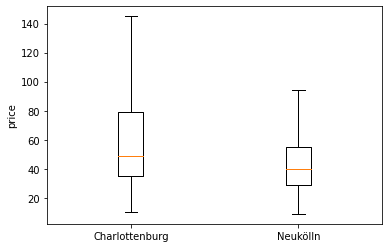

In [290]:
#Visualize the price distribution for the most and least expensive district
fig1, ax1 = plt.subplots()
ax1.boxplot([CB['price_int'], NK['price_int']],showfliers=False )
ax1.set_xticklabels(['Charlottenburg', 'Neukölln'])
ax1.set_ylabel('price')

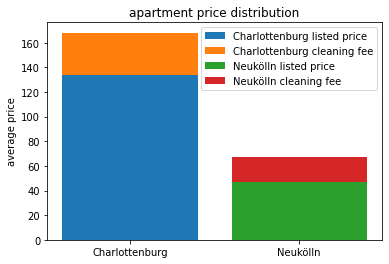

In [291]:
#Visualize if cleaning_fee was used to hide costs
fig, ax= plt.subplots()
ax.bar('Charlottenburg', CB_mean, label='Charlottenburg listed price')
ax.bar('Charlottenburg',CB_mean_cleaning, bottom=CB_mean, label= 'Charlottenburg cleaning fee')
ax.bar('Neukölln', NK_mean, label= "Neukölln listed price")
ax.bar('Neukölln', NK_mean_cleaning, bottom=NK_mean, label='Neukölln cleaning fee')
ax.set_ylabel('average price')
ax.set_title('apartment price distribution')
ax.legend()
plt.show()

#yes it was!

In [292]:
#@title 4.3 Merging of Listings and Reviewing the Data Set


In [293]:
#Aggregate reviews by ID
n_reviews=reviews.groupby('listing_id').size().reset_index()
n_reviews =n_reviews.rename(columns={'listing_id': 'id', 0:'n_reviews'})
n_reviews

,id,n_reviews
0,2015,118
1,2695,6
2,3176,143
3,3309,25
4,7071,197
...,...,...
18633,29772631,1
18634,29784461,5
18635,29792124,1
18636,29817383,1


In [294]:
#Merge listings and aggregated reviews data

listings_reviews=pd.merge(listings,n_reviews, on='id')
listings_reviews

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included,price_use,price_int,cleaning_fee_use,cleaning_fee_int,price (cleaning included),n_reviews
0,28684898,$50.00,Neukölln,52.473978,13.454423,1.0,18,2.0,2.0,9.0,Real Bed,1,13,73,Apartment,f,$0.00,Private room,NaN,1,50.00,50.0,0.00,0.0,50.0,8
1,22607348,$10.00,Treptow - Köpenick,52.468095,13.487103,1.0,0,1.0,1.0,9.0,Real Bed,30,1124,156,Apartment,f,NaN,Private room,NaN,1,10.00,10.0,NaN,NaN,NaN,7
2,21019199,$35.00,Neukölln,52.481810,13.437268,1.0,0,1.0,1.0,9.0,Real Bed,1,1125,0,Apartment,f,$15.00,Private room,NaN,1,35.00,35.0,15.00,15.0,50.0,10
3,21919556,$99.00,Pankow,52.537269,13.416036,2.0,0,2.0,2.0,NaN,Real Bed,14,41,35,Apartment,f,$50.00,Entire home/apt,NaN,1,99.00,99.0,50.00,50.0,149.0,1
4,4820648,$39.00,Friedrichshain-Kreuzberg,52.491483,13.387362,1.0,0,1.0,1.0,9.0,Real Bed,60,1125,289,Apartment,f,NaN,Entire home/apt,NaN,1,39.00,39.0,NaN,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11163,16880131,$40.00,Tempelhof - Schöneberg,52.472176,13.375734,1.0,27,1.0,1.0,10.0,Real Bed,3,6,165,Apartment,f,NaN,Private room,NaN,1,40.00,40.0,NaN,NaN,NaN,44
11164,17783594,$38.00,Treptow - Köpenick,52.469634,13.588212,1.0,18,2.0,2.0,9.0,Real Bed,1,14,65,Apartment,f,$50.00,Entire home/apt,NaN,1,38.00,38.0,50.00,50.0,88.0,3
11165,7823323,$22.00,Mitte,52.524995,13.336786,2.0,0,1.0,1.0,9.0,Real Bed,4,12,0,Apartment,f,NaN,Private room,NaN,1,22.00,22.0,NaN,NaN,NaN,2
11166,901569,$40.00,Pankow,52.530876,13.433975,1.0,5,1.0,1.0,10.0,Real Bed,2,45,334,Apartment,f,NaN,Private room,0.0,1,40.00,40.0,NaN,NaN,NaN,58


In [295]:
#selecting the top 200 reviewed appartments
listings_reviews=listings_reviews.sort_values(by =['n_reviews'], ascending=False)
listings_reviews_200 = listings_reviews[:200]
listings_reviews_200

,id,price,neighbourhood_group_cleansed,latitude,longitude,bathrooms,availability_30,beds,bedrooms,review_scores_value,bed_type,minimum_nights,maximum_nights,availability_365,property_type,is_business_travel_ready,cleaning_fee,room_type,square_feet,guests_included,price_use,price_int,cleaning_fee_use,cleaning_fee_int,price (cleaning included),n_reviews
1319,221015,$75.00,Mitte,52.540630,13.351474,1.0,6,2.0,2.0,10.0,Real Bed,1,90,107,Apartment,f,$30.00,Entire home/apt,NaN,2,75.00,75.0,30.00,30.0,105.0,413
6328,192499,$49.00,Friedrichshain-Kreuzberg,52.493648,13.421149,1.0,11,1.0,1.0,10.0,Real Bed,2,10,140,Boutique hotel,f,NaN,Private room,NaN,1,49.00,49.0,NaN,NaN,NaN,398
2999,926670,$75.00,Mitte,52.542175,13.351202,1.0,1,2.0,2.0,10.0,Real Bed,1,90,109,Apartment,f,$30.00,Entire home/apt,NaN,2,75.00,75.0,30.00,30.0,105.0,387
4816,238396,$60.00,Pankow,52.532141,13.415194,1.0,0,2.0,1.0,9.0,Real Bed,3,30,91,Apartment,f,$25.00,Entire home/apt,NaN,1,60.00,60.0,25.00,25.0,85.0,373
1252,803960,$79.00,Friedrichshain-Kreuzberg,52.491390,13.413051,1.0,2,2.0,1.0,10.0,Real Bed,1,14,215,Apartment,f,$50.00,Entire home/apt,603.0,2,79.00,79.0,50.00,50.0,129.0,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,13151207,$54.00,Mitte,52.499919,13.364076,0.5,14,1.0,1.0,9.0,Real Bed,2,1125,83,Apartment,f,NaN,Private room,NaN,2,54.00,54.0,NaN,NaN,NaN,166
10885,270477,$89.00,Pankow,52.543356,13.417356,1.0,8,2.0,1.0,9.0,Real Bed,3,1125,316,Apartment,f,$65.00,Entire home/apt,NaN,1,89.00,89.0,65.00,65.0,154.0,166
10943,1328436,$63.00,Friedrichshain-Kreuzberg,52.489062,13.390937,1.0,0,1.0,1.0,9.0,Real Bed,3,45,6,Apartment,f,$25.00,Entire home/apt,0.0,2,63.00,63.0,25.00,25.0,88.0,166
5426,878387,$59.00,Tempelhof - Schöneberg,52.497671,13.341088,1.0,10,1.0,1.0,9.0,Real Bed,1,30,326,Apartment,f,$30.00,Entire home/apt,NaN,1,59.00,59.0,30.00,30.0,89.0,166


In [296]:
# get the number of listings per neighbourhood
review_plot= listings_reviews_200.groupby('neighbourhood_group_cleansed').size()
review_plot

neighbourhood_group_cleansed
Charlottenburg-Wilm.        11
Friedrichshain-Kreuzberg    44
Lichtenberg                  3
Mitte                       60
Neukölln                    28
Pankow                      33
Reinickendorf                3
Tempelhof - Schöneberg      15
Treptow - Köpenick           3
dtype: int64

In [297]:
review_plot = review_plot.sort_values()

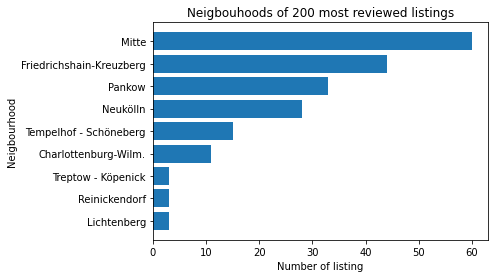

In [298]:
#plot amount of apartments in each district
fig, ax= plt.subplots()
ax.barh(y=review_plot.index, width=review_plot)
ax.set_xlabel('Number of listing')
ax.set_ylabel('Neigbourhood')
ax.set_title('Neigbouhoods of 200 most reviewed listings')

plt.show()

In [ ]:
#initializing the map we need
m = folium.Map(
    location=[52.473978, 13.4],
    tiles='Stamen Toner',
    zoom_start=11
)
m

In [ ]:
#Draw a circle for every available apartment on map
#initializing the first map

for index, row in listings_reviews_200.iterrows():
  location1= [row["latitude"], row["longitude"]]
  folium.Circle(
    radius=50,
    location=location1,
    color='#3186cc',
    fill=True
     ).add_to(m)

m

In [ ]:
#Colorize each circle according to its districts
#initializing the second map
colorDict = {
    'Charlottenburg-Wilm.': 'blue',
    'Lichtenberg': 'orange',
    'Mitte': 'green',
    'Neukölln': 'red',
    'Friedrichshain-Kreuzberg': 'purple',
    'Pankow': 'darkblue',
    'Tempelhof - Schöneberg': 'beige',
    'Treptow - Köpenick': 'lightred',
    'Reinickendorf': 'darkgreen'
}
     
for index, row in listings_reviews_200.iterrows():
   folium.Circle(
       radius=row['n_reviews'],
       location=[row['latitude'], row['longitude']],
       color=colorDict[row['neighbourhood_group_cleansed']],
       fill=True
       ).add_to(m)

m

In [ ]:
#including the HeatMap feature
from folium import plugins
from folium.plugins import HeatMap

heat_df = listings_reviews_200[listings_reviews_200['n_reviews']>1] # Reducing data size so it runs faster
heat_df = listings_reviews_200[['latitude', 'longitude']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude'])

heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(m)

# Display the map
m

In [ ]:
#@title 5 Price Prediction – Application of Statistical Methods


In [303]:
#load the prediction data set
val = pd.read_csv("https://tinyurl.com/techacademyValSet")
train = pd.read_csv('https://tinyurl.com/techacademyTrainSet')
test = pd.read_csv('https://tinyurl.com/techacademyTestSet')
train.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,16,19,27,32,33,43,53,65,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,28684898.0,https://www.airbnb.com/rooms/28684898,2.018111e+13,2018-11-07,Big and Bright bedroom in the heart of Neukölln,"Modern 2,5 bedroom Apartment: Big and bright r...",NaN,"Modern 2,5 bedroom Apartment: Big and bright r...",none,NaN,NaN,NaN,NaN,NaN,- No shoes in the house,NaN,NaN,https://a0.muscache.com/im/pictures/328c0d96-b...,NaN,198444859,https://www.airbnb.com/users/show/198444859,Majke (B),2018-06-27,"Berlin, Berlin, Germany","I’m a frequent traveler due to my job, hence m...",within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/e5b56...,https://a0.muscache.com/im/pictures/user/e5b56...,Neukölln,1.0,1.0,"['email', 'phone']",t,f,"Berlin, Berlin, Germany",Neukölln,Rixdorf,...,2.0,Real Bed,"{Wifi,Heating,Washer,Dryer,""Fire extinguisher""...",NaN,$50.00,NaN,NaN,$0.00,$0.00,1,$0.00,1,13,2 weeks ago,t,18.0,43.0,73.0,73.0,2018-11-07,8.0,2018-09-29,2018-11-01,97.0,10.0,10.0,10.0,10.0,9.0,9.0,t,NaN,NaN,f,f,flexible,f,f,1.0,6.00
1,22607348.0,https://www.airbnb.com/rooms/22607348,2.018111e+13,2018-11-07,little room with loftbed in Baumschulenweg,REGISTRATION (ANMELDUNG) not possible. I rent ...,The bed is on the attic and you reach with a l...,REGISTRATION (ANMELDUNG) not possible. I rent ...,none,NaN,NaN,NaN,"kitchen, bath, balcony",NaN,turn off lights when yu are not in the room. q...,NaN,NaN,https://a0.muscache.com/im/pictures/c678ff8c-e...,NaN,9928638,https://www.airbnb.com/users/show/9928638,Sergio,2013-11-10,"Berlin, Berlin, Germany",ich spreche Deutsch\r\nI speak Englisch\r\nhab...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/02df6...,https://a0.muscache.com/im/pictures/user/02df6...,Baumschulenweg,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Baumschulenweg,Baumschulenweg,...,1.0,Real Bed,"{Wifi,Kitchen,""Free street parking"",Heating,""F...",NaN,$10.00,NaN,NaN,NaN,NaN,1,$0.00,30,1124,6 days ago,t,0.0,0.0,4.0,156.0,2018-11-07,7.0,2018-05-31,2018-10-31,91.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,2.0,1.30
2,21019199.0,https://www.airbnb.com/rooms/21019199,2.018111e+13,2018-11-07,Bright and quiet room in central Neukölln.,The flat is located between two lively streets...,NaN,The flat is located between two lively streets...,none,NaN,NaN,NaN,NaN,NaN,Washing up after yourself in the kitchen is ne...,NaN,NaN,https://a0.muscache.com/im/pictures/5d514425-b...,NaN,28281548,https://www.airbnb.com/users/show/28281548,Kristina,2015-02-24,"Berlin, Berlin, Germany",NaN,within a day,100%,NaN,t,https://a0.muscache.com/im/pictures/6bf50c47-0...,https://a0.muscache.com/im/pictures/6bf50c47-0...,Neukölln,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Berlin, Berlin,

In [304]:
#@title 5.1 Examine the Correlation Between the Variables 

In [305]:
trainData = train.loc[:,['price','host_response_rate','beds','security_deposit','cleaning_fee','availability_365','number_of_reviews','review_scores_rating']]

#convert price
trainData['price']= trainData['price'].str.replace('$','')
trainData['price'] = pd.to_numeric(trainData['price'],errors = 'coerce')

#Remove outliers from price. I decided to remove all appartments which cost less then 5€ and more than 3* the upper 75% quantile
trainData=trainData.loc[trainData['price'] >5]
max_price= trainData['price'].quantile(0.75)+3* trainData['price'].quantile(0.75)-trainData['price'].quantile(0.25)
trainData= trainData.loc[trainData['price']<max_price]

#convert host_response_rate 
trainData['host_response_rate']= trainData['host_response_rate'].str.replace('%','')
trainData['host_response_rate'] = pd.to_numeric(trainData['host_response_rate'],errors = 'coerce')
trainData=trainData.replace('Apartment',np.NaN)

#convert cleaning_fee 
trainData['cleaning_fee']= trainData['cleaning_fee'].str.replace('$','')
trainData['cleaning_fee']= trainData['cleaning_fee'].str.replace(',','')
trainData['cleaning_fee'] = pd.to_numeric(trainData['cleaning_fee'],errors = 'coerce')

#Convert Beds to dummies
#Create 3 Categories of 0-1 Beds 2 Beds, 3+Beds
trainData['bed2']=trainData['beds'].copy()
trainData['beds']=np.where(trainData['beds']>2, 3, trainData['beds'])
trainData['beds']=np.where(trainData['beds']<2, 1, trainData['beds'])
trainData['beds']=np.where(trainData['beds']==2, 2, trainData['beds'])
dummies= pd.get_dummies(trainData["beds"])
trainData= pd.concat([trainData, dummies], axis=1)

trainData

,price,host_response_rate,beds,security_deposit,cleaning_fee,availability_365,number_of_reviews,review_scores_rating,bed2,1.0,2.0,3.0
0,50.0,100.0,2.0,$0.00,0.0,73.0,8.0,97.0,2.0,0,1,0
1,10.0,100.0,1.0,NaN,NaN,156.0,7.0,91.0,1.0,1,0,0
2,35.0,100.0,1.0,$0.00,15.0,0.0,10.0,96.0,1.0,1,0,0
3,99.0,NaN,2.0,$300.00,50.0,35.0,1.0,NaN,2.0,0,1,0
4,39.0,100.0,1.0,NaN,NaN,289.0,13.0,97.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13527,38.0,NaN,2.0,$100.00,50.0,65.0,3.0,100.0,2.0,0,1,0
13528,45.0,NaN,1.0,$300.00,0.0,0.0,0.0,NaN,1.0,1,0,0
13529,22.0,NaN,1.0,NaN,NaN,0.0,2.0,80.0,1.0,1,0,0
13530,40.0,100.0,1.0,NaN,NaN,334.0,58.0,96.0,1.0,1,0,0


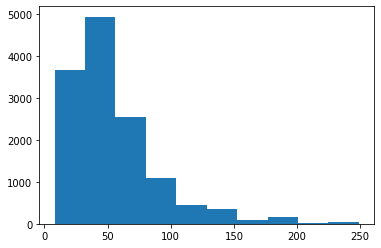

count    13339.000000
mean        55.633706
std         35.524916
min          8.000000
25%         30.000000
50%         45.000000
75%         69.500000
max        249.000000
Name: price, dtype: float64

In [306]:
plt.hist(trainData['price'].dropna(), label= 'price')
plt.show()
trainData['price'].describe()

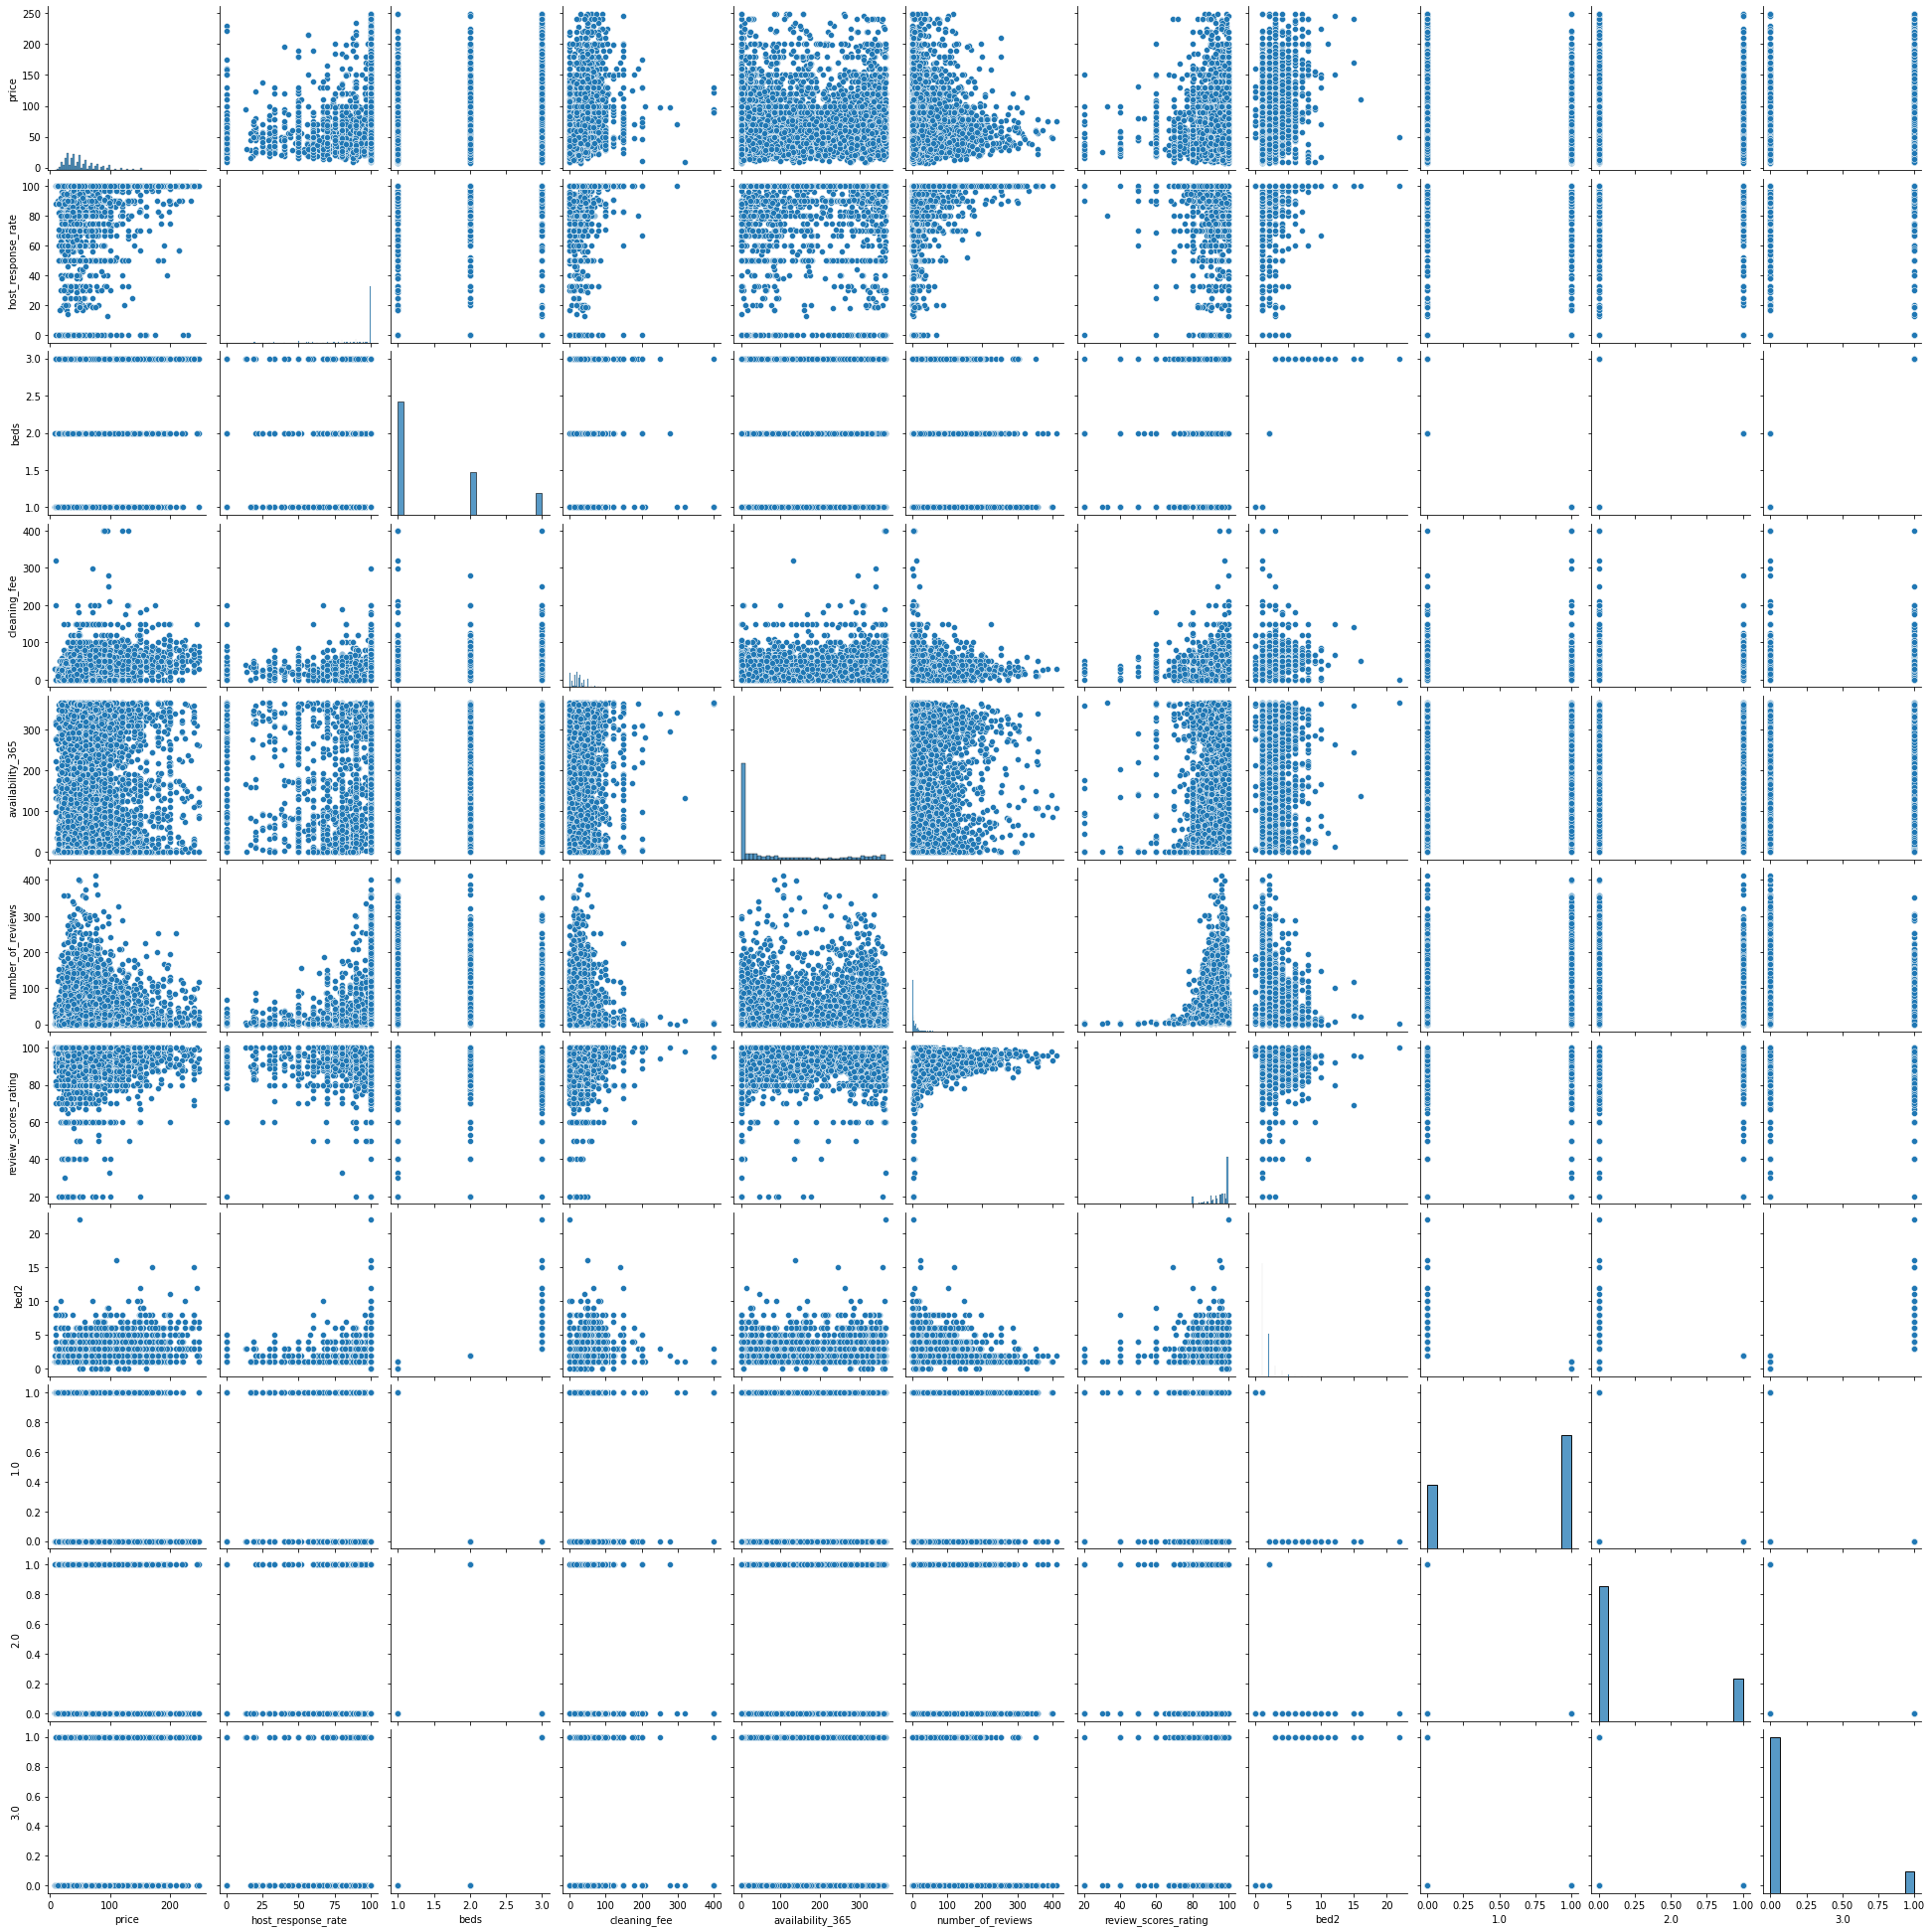

In [307]:
#Visualize feature correlations in a correlation matrix/heatmap
sns.pairplot(trainData)
#examining how different variables might be correlated

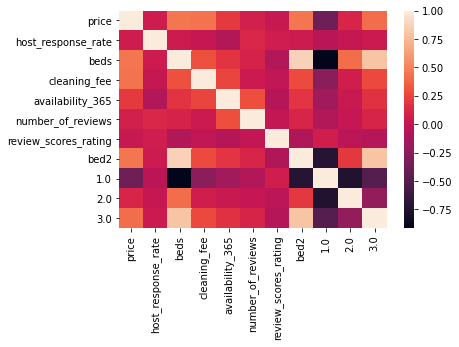

In [308]:
#plotting a HeatMap
sns.heatmap(trainData.corr())


In [309]:
#@title 5.2 First Predictions with Simple Regression Models 


In [310]:
RegData = trainData.loc[:,['price', 'cleaning_fee','beds','availability_365', 1.0, 2.0, 3.0 ]]
RegData = RegData.dropna()
y_train = RegData['price']

In [311]:
#Simple regression model using one variable
x1_train= RegData['cleaning_fee']
x1_train= x1_train.values.reshape(-1,1)
X1 = sm.add_constant(x1_train)
est = sm.OLS(y_train, X1)
est1 = est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2136.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:48:26   Log-Likelihood:                -44856.
No. Observations:                9121   AIC:                         8.972e+04
Df Residuals:                    9119   BIC:                         8.973e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8102      0.504     84.989      0.0

In [312]:
x3_train= RegData[[ 2.0, 3.0]]
X2 = sm.add_constant(x3_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     1259.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:48:26   Log-Likelihood:                -44704.
No. Observations:                9121   AIC:                         8.941e+04
Df Residuals:                    9118   BIC:                         8.943e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.1775      0.441    109.340      0.0

In [313]:
x4_train= RegData[[ 2.0, 3.0, 'cleaning_fee']]
X2 = sm.add_constant(x4_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1381.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:48:27   Log-Likelihood:                -44107.
No. Observations:                9121   AIC:                         8.822e+04
Df Residuals:                    9117   BIC:                         8.825e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.0627      0.501     76.023   

In [314]:
#Improve your model using more features
x5_train= RegData[[ 2.0, 3.0, 'cleaning_fee', 'availability_365']]
X2 = sm.add_constant(x5_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1036.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:48:27   Log-Likelihood:                -44106.
No. Observations:                9121   AIC:                         8.822e+04
Df Residuals:                    9116   BIC:                         8.826e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.8606      0.523  

In [315]:
#@title 5.3 From Training to Testing – Making Predictions


In [316]:
#Use test data set to predict prices of the apartments
testData = test.loc[:,['price','beds','cleaning_fee','availability_365']]

#convert price
testData["price"]= testData['price'].str.replace('$',"")
testData['price'] = pd.to_numeric(testData['price'],errors = 'coerce')

#Remove outliers from price. I decided to remove all appartments which cost less then 5€ and more than 3* the upper 75% quantile
testData=testData.loc[testData['price'] >5]
max_price= testData["price"].quantile(0.75)+3* testData["price"].quantile(0.75)-testData["price"].quantile(0.25)
testData= testData.loc[testData["price"]<max_price]


#convert cleaning_fee 
testData["cleaning_fee"]= testData['cleaning_fee'].str.replace('$',"")
testData["cleaning_fee"]= testData['cleaning_fee'].str.replace(',',"")
testData['cleaning_fee'] = pd.to_numeric(testData['cleaning_fee'],errors = 'coerce')

#Convert Beds to dummies
#Create 3 Categories of 0-1 Beds 2 Beds, 3+Beds
testData["bed2"]=testData["beds"].copy()
testData['beds']=np.where(testData['beds']>2, 3, testData['beds'])
testData['beds']=np.where(testData['beds']<2, 1, testData['beds'])
testData['beds']=np.where(testData['beds']==2, 2, testData['beds'])
dummies= pd.get_dummies(testData["beds"])
testData= pd.concat([testData, dummies], axis=1)

testData=testData.dropna()
y_test= testData["price"]

In [317]:
x4_test= testData[[ 2.0, 3.0, "cleaning_fee", "beds"]]
X2 = sm.add_constant(x4_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1381.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:48:27   Log-Likelihood:                -44107.
No. Observations:                9121   AIC:                         8.822e+04
Df Residuals:                    9117   BIC:                         8.825e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.0627      0.501     76.023   

In [318]:
model = LinearRegression()
model.fit(x4_test, y_test)
r_sqs = model.score(x4_test, y_test)
print(r_sqs)
predicted_price_t = model.predict(x4_test)

0.3149579637251647


In [319]:
RMSE = mean_squared_error(y_test, predicted_price_t, squared=False)
RMSE

29.83372940866353

In [320]:
model = LinearRegression()
model=model.fit(x4_train, y_train)
r_sqs = model.score(x4_train, y_train)
print(r_sqs)
predicted_price_t=model.predict(x4_train)

0.31246591162565984


In [321]:
RMSE = mean_squared_error(y_train, predicted_price_t, squared=False)
RMSE

30.472684412905412

In [322]:
#Compare your predictions with the true values

#testing Data RSME < training Data RSME

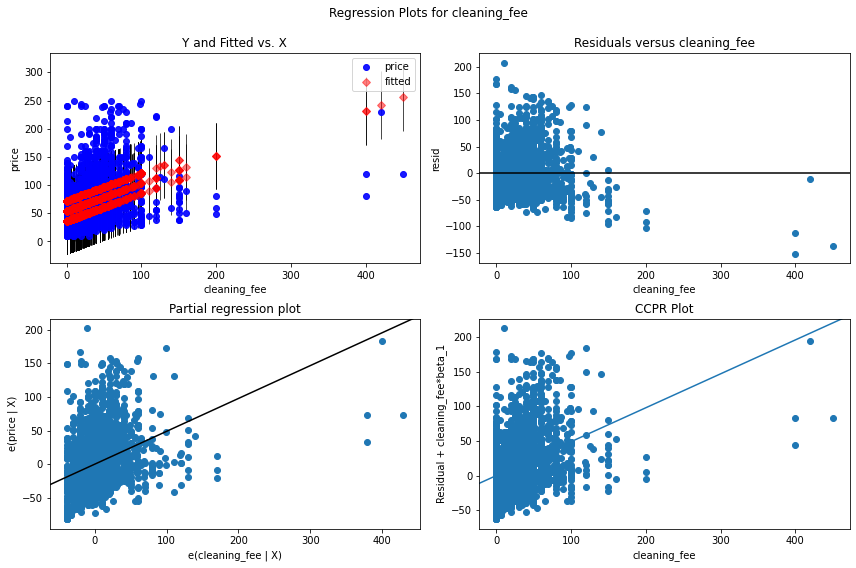

In [323]:
model = ols('price ~ cleaning_fee + beds', data=testData).fit()
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'cleaning_fee', fig=fig)

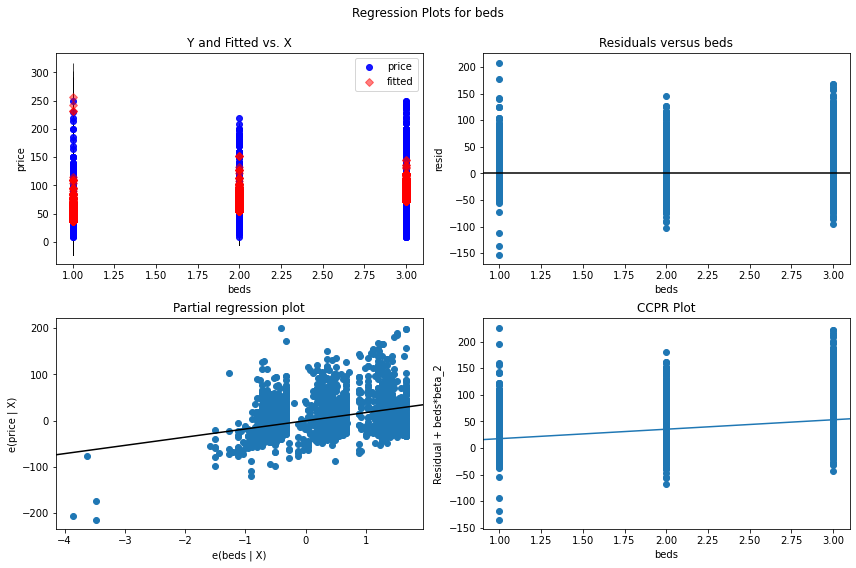

In [324]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'beds', fig=fig)

In [325]:
#Thanks for organizing the entire project! To join is still one of the best decisions I have made during univesity. :)
#If it's possible, I would love to become a Python Tutor also in case the next semester is still online. I hope you will announce open positions on social media. :)